In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import mlxtend
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

In [6]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
        c, s = np.cos(theta), np.sin(theta)
        R = np.array(((c,-s), (s, c)))
        X = X @ R
        
    return X, y

In [12]:
X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
mlxtend.__version__

'0.22.0'

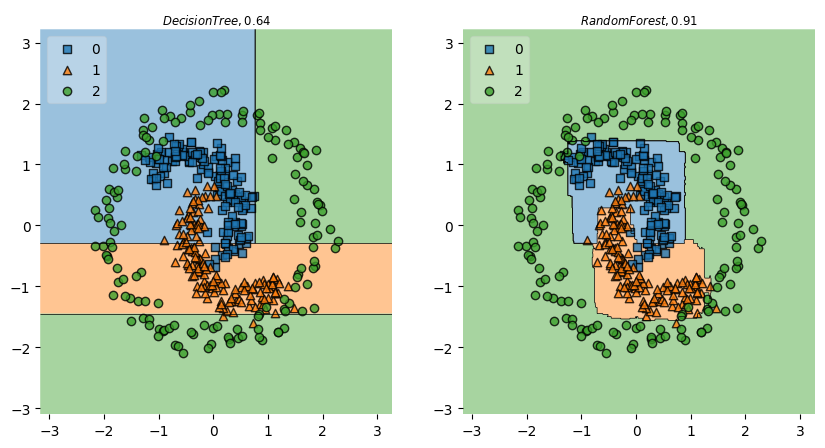

In [15]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf1 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=4)
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree ' ,'Random Forest ']
for clf, lab, grd in zip([clf0, clf1,], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y_test, clf.predict(X_test))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' +
    str('{:.2f}'.format(a))+'}$')
plt.show()


In [16]:
import xgboost as xgb
from xgboost import XGBClassifier


In [17]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.69%


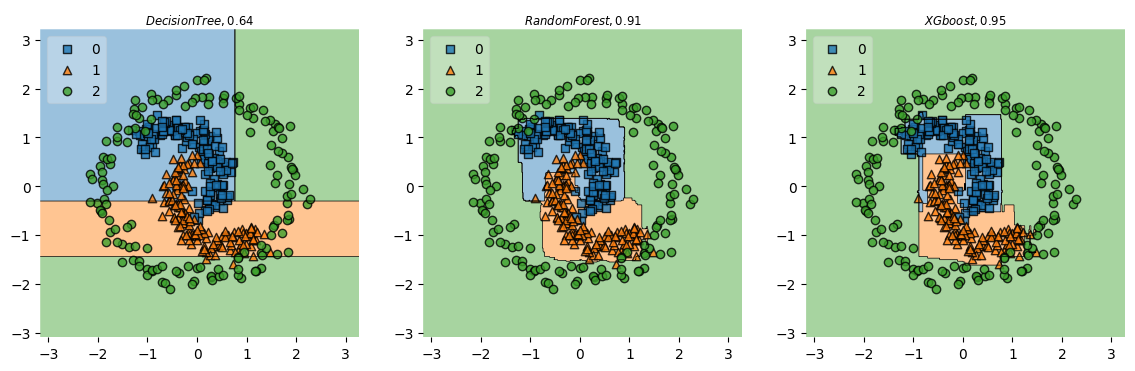

In [20]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf1 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=4)
clf2 = XGBClassifier()
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(14,4))
labels = ['Decision Tree ' ,'Random Forest ', 'XGboost']
for clf, lab, grd in zip([clf0, clf1, clf2], labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y_test, clf.predict(X_test))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' +
    str('{:.2f}'.format(a))+'}$')
plt.show()

In [ ]:
from catboost import CatBoostClassifier, Pool
train_data = Pool([[[0.1, 0.12, 0.33], [1.0, 0.7], 2, "male"],
                   [[0.0, 0.8, 0.2], [1.1, 0.2], 1, "female"], 
                   [[0.2, 0.31, 0.1], [0.3, 0.11], 2, "female"],
                   [[0.01, 0.2, 0.9], [0.62, 0.12], 1, "male"]],
label = [1, 0, 0, 1],
cat_features=[3],
embedding_features=[0, 1]
) #обучающие